In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [4]:
df = pd.read_csv('spacex_web_scraped.csv')

df.columns = df.columns.str.strip()

df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

df['Payload mass'] = df['Payload mass'].str.replace(',', '').str.extract(r'(\d+)').astype(float)

df['Date'] = pd.to_datetime(df['Date'], format='%d %B %Y', errors='coerce')

df['Time'] = pd.to_datetime(df['Time'], format='%H:%M', errors='coerce').dt.time

df = df.dropna(subset=['Date', 'Time'])  # Drop rows where 'Date' or 'Time' is NaT

print("\nCleaned DataFrame:")
print(df.head())


Cleaned DataFrame:
   Flight No. Launch site                               Payload  Payload mass  \
0           1       CCAFS  Dragon Spacecraft Qualification Unit           0.0   
1           2       CCAFS                                Dragon           0.0   
2           3       CCAFS                                Dragon         525.0   
3           4       CCAFS                          SpaceX CRS-1        4700.0   
4           5       CCAFS                          SpaceX CRS-2        4877.0   

  Orbit Customer Launch outcome   Version Booster Booster landing       Date  \
0   LEO   SpaceX        Success  F9 v1.07B0003.18         Failure 2010-06-04   
1   LEO     NASA        Success  F9 v1.07B0004.18         Failure 2010-12-08   
2   LEO     NASA        Success  F9 v1.07B0005.18      No attempt 2012-05-22   
3   LEO     NASA        Success  F9 v1.07B0006.18      No attempt 2012-10-08   
4   LEO     NASA        Success  F9 v1.07B0007.18      No attempt 2013-03-01   

       Time 

C:\Users\SUMBERA\AppData\Local\Temp\ipykernel_27840\2125491690.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [5]:
# Data Analysis

# 1. Number of launches per year
df['Year'] = df['Date'].dt.year
launches_per_year = df['Year'].value_counts().sort_index()

# 2. Number of successful and failed launches
launch_outcomes = df['Launch outcome'].value_counts()

# 3. Number of launches per site
launches_per_site = df['Launch site'].value_counts()

# 4. Average payload mass per orbit type
average_payload_mass_per_orbit = df.groupby('Orbit')['Payload mass'].mean()

# 5. Number of booster landings (successful, failed, no attempt)
booster_landings = df['Booster landing'].value_counts()

# Display the analysis results
print("\nNumber of launches per year:")
print(launches_per_year)

print("\nNumber of successful and failed launches:")
print(launch_outcomes)

print("\nNumber of launches per site:")
print(launches_per_site)

print("\nAverage payload mass per orbit type:")
print(average_payload_mass_per_orbit)

print("\nNumber of booster landings (successful, failed, no attempt):")
print(booster_landings)


Number of launches per year:
Year
2010     2
2012     2
2013     3
2014     6
2015     7
2016     8
2017    17
2018    19
2019    11
2020    15
2021    16
Name: count, dtype: int64

Number of successful and failed launches:
Launch outcome
Success    105
Failure      1
Name: count, dtype: int64

Number of launches per site:
Launch site
CCAFS             36
KSC               27
Cape Canaveral    20
VAFB              14
CCSFS              9
Name: count, dtype: int64

Average payload mass per orbit type:
Orbit
GTO             4994.774194
HEO              466.000000
LEO             8448.618182
MEO             4400.000000
Polar           9151.428571
Polar orbit      500.000000
SSO             2992.500000
Sub-orbital    12050.000000
Name: Payload mass, dtype: float64

Number of booster landings (successful, failed, no attempt):
Booster landing
Success         66
No attempt      22
Failure         10
Controlled       5
Uncontrolled     2
Precluded        1
Name: count, dtype: int64


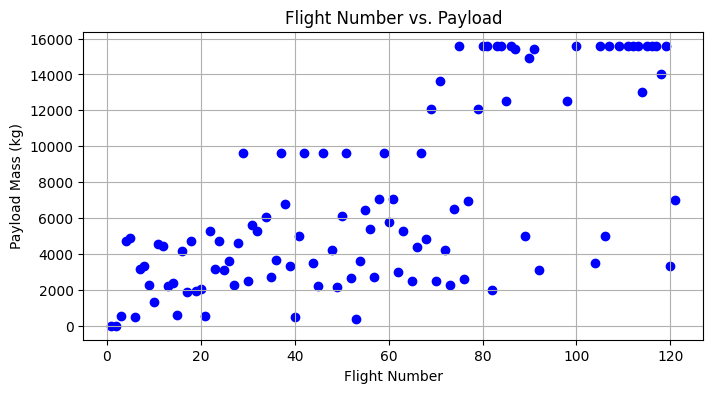

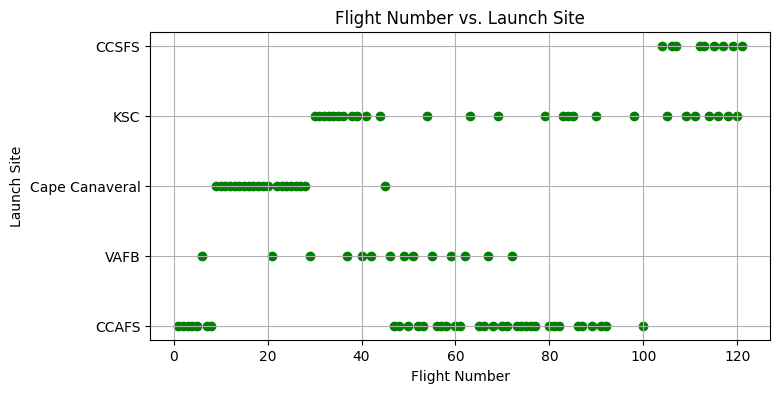

In [8]:
# Visualizations

# 1. Flight Number vs. Payload
plt.figure(figsize=(8 ,4))
plt.scatter(df['Flight No.'], df['Payload mass'], color='blue')
plt.title('Flight Number vs. Payload')
plt.xlabel('Flight Number')
plt.ylabel('Payload Mass (kg)')
plt.grid(True)
plt.show()

# 2. Flight Number vs. Launch Site
plt.figure(figsize=(8 ,4))
plt.scatter(df['Flight No.'], df['Launch site'], color='green')
plt.title('Flight Number vs. Launch Site')
plt.xlabel('Flight Number')
plt.ylabel('Launch Site')
plt.grid(True)
plt.show()

# 3. Payload Mass (kg) vs. Launch Site
plt.figure(figsize=(8 ,4))
plt.scatter(df['Payload mass'], df['Launch site'], color='red')
plt.title('Payload Mass (kg) vs. Launch Site')
plt.xlabel('Payload Mass (kg)')
plt.ylabel('Launch Site')
plt.grid(True)
plt.show()

# 4. Payload Mass (kg) vs. Orbit type
plt.figure(figsize=(8 ,4))
plt.scatter(df['Payload mass'], df['Orbit'], color='purple')
plt.title('Payload Mass (kg) vs. Orbit Type')
plt.xlabel('Payload Mass (kg)')
plt.ylabel('Orbit Type')
plt.grid(True)
plt.show()

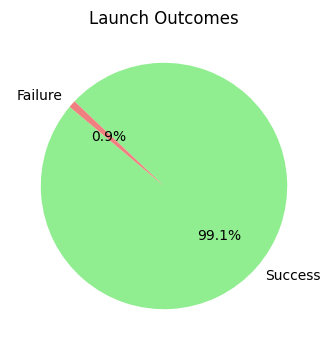

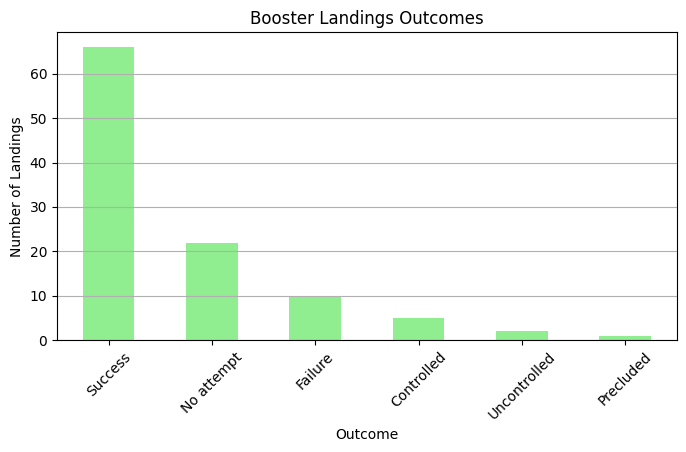

In [ ]:
# Deeper Analysis:

# 1. Number of launches per year with data labels
plt.figure(figsize=(8, 4))
bars = launches_per_year.plot(kind='bar', color='skyblue')
plt.title('Number of Launches per Year')
plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Add data labels
for bar in bars.patches:
    plt.annotate(format(bar.get_height(), '.0f'),
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 ha='center', va='center',
                 size=10, xytext=(0, 8),
                 textcoords='offset points')

plt.show()

# 2. Number of successful and failed launches
plt.figure(figsize=(8, 4))
launch_outcomes.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'lightcoral'])
plt.title('Launch Outcomes')
plt.ylabel('')
plt.show()

# 3. Number of launches per site
plt.figure(figsize=(8, 4))
launches_per_site.plot(kind='bar', color='lightblue')
plt.title('Number of Launches per Site')
plt.xlabel('Launch Site')
plt.ylabel('Number of Launches')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# 4. Average payload mass per orbit type
plt.figure(figsize=(8, 4))
average_payload_mass_per_orbit.plot(kind='bar', color='lightcoral')
plt.title('Average Payload Mass per Orbit Type')
plt.xlabel('Orbit Type')
plt.ylabel('Average Payload Mass (kg)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# 5. Number of booster landings (successful, failed, no attempt)
plt.figure(figsize=(8, 4))
booster_landings.plot(kind='bar', color='lightgreen')
plt.title('Booster Landings Outcomes')
plt.xlabel('Outcome')
plt.ylabel('Number of Landings')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()